In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [419]:
df=pd.read_csv(r"D:\AI\Titanic-Dataset.csv",index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [420]:
df=df.drop(["Name","Ticket","Cabin"],axis=1)
df=df.dropna()

In [421]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [422]:
mapper_sex={
    "male":1,
    "female":0
}
mapper_embarked={
    "S":0,
    "C":1,
    "Q":2
}

df["Sex"]=df["Sex"].map(mapper_sex)
df["Embarked"]=df["Embarked"].map(mapper_embarked)


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [424]:
X=df.drop("Survived",axis=1).to_numpy().astype(np.float64)
y=df["Survived"].to_numpy(np.float64)

In [425]:
X.shape

(712, 7)

In [426]:
X_b=np.hstack([np.ones((X.shape[0],1)),X])


In [427]:
val_size=0.2
test_size=0.125
random_sate=2
is_shuffle=True

# Data set validation: 20% = 100-20=80
X_train,X_val,y_train,y_val=train_test_split(
    X_b,y,
    test_size=test_size,
    random_state=random_sate,
    shuffle=is_shuffle
)

# Data set test: 10% = 10/80=0.125
X_train,X_test,y_train,y_test=train_test_split(
    X_train,y_train,
    test_size=test_size,
    random_state=random_sate,
    shuffle=is_shuffle
)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(545, 8)
(78, 8)
(89, 8)


In [428]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)


In [429]:
lr=0.1
epochs=100
batch_size=16
np.random.seed(random_sate)
theta=np.random.uniform(size=X_train.shape[1])
theta

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097])

In [430]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X,theta):
    z=np.dot(X,theta)
    y_hat=sigmoid(z)
    return y_hat

def loss(y_hat,y):
    y_hat=np.clip(y_hat,1e-7,1-1e-7)
    m=len(y)
    return (-y.T.dot(np.log(y_hat))-(1-y).T.dot(np.log(1-y_hat)))/m

def compute_gradient(X,y_hat,y):
    m=len(y)
    gradient = (X.T.dot(y_hat - y)) / m
    return gradient

def update_grad(theta,lr,gradient):
    theta=theta-lr*gradient
    return theta

def accuracy(X,y,theta):
    y_hat=predict(X,theta).round()
    acc=(y_hat==y).mean()
    return acc



In [431]:
# train_losses, val_losses = [], []
# train_accs, val_accs = [], []
# for epoch in range(epochs):

#     for i in range(0,X_train.shape[0],batch_size):
#         xi=X_train[i:i+batch_size]
#         yi=y_train[i:i+batch_size]

#         y_hat = predict(xi, theta)
#         gradient = compute_gradient(xi, y_hat, yi)
#         theta = update_grad(theta, lr, gradient)

#     # === Sau 1 epoch mới tính loss/acc ===
#         train_loss = loss(predict(X_train, theta), y_train)
#         val_loss = loss(predict(X_val, theta), y_val)
#         train_acc = accuracy(X_train, y_train, theta)
#         val_acc = accuracy(X_val, y_val, theta)

#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         train_accs.append(train_acc)
#         val_accs.append(val_acc)

In [432]:
# fig, ax = plt.subplots(2,2, figsize=(12,10))
# ax[0,0].plot(train_losses, label="Train Loss")
# ax[0,1].plot(val_losses, label="Val Loss")
# ax[1,0].plot(train_accs, label="Train Acc")
# ax[1,1].plot(val_accs, label="Val Acc")
# for a in ax.flat: a.legend()

In [433]:
train_losses, val_losses, train_accs, val_accs = [], [], [], []

best_val_loss=float("inf")
partience=50 # so epoch wait
wait=0
best_theta=theta.copy()

for epoch in range(epochs):


    for i in range(0, X_train.shape[0], batch_size):
        xi=X_train[i:i+batch_size]
        yi=y_train[i:i+batch_size]
        y_hat = predict(xi, theta)
        gradient = compute_gradient(xi, y_hat, yi)
        theta = update_grad(theta, lr, gradient)

    train_loss = loss(predict(X_train, theta), y_train)
    val_loss   = loss(predict(X_val, theta), y_val)
    train_acc  = accuracy(X_train, y_train, theta)
    val_acc    = accuracy(X_val, y_val, theta)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if val_loss<best_val_loss:
        best_val_loss=val_loss
        best_theta=theta.copy()
        wait=0
    else:
        wait+=1
        if wait>partience:
            print(f"early stopping epoch:{epoch+1}")
            theta=best_theta
            print(f"best_theta:{best_theta}")
            break

early stopping epoch:55
best_theta:[ 0.4359949  -0.56491981 -1.13805299 -0.2379625  -0.12696125 -0.01777692
  0.38418083  0.2109647 ]


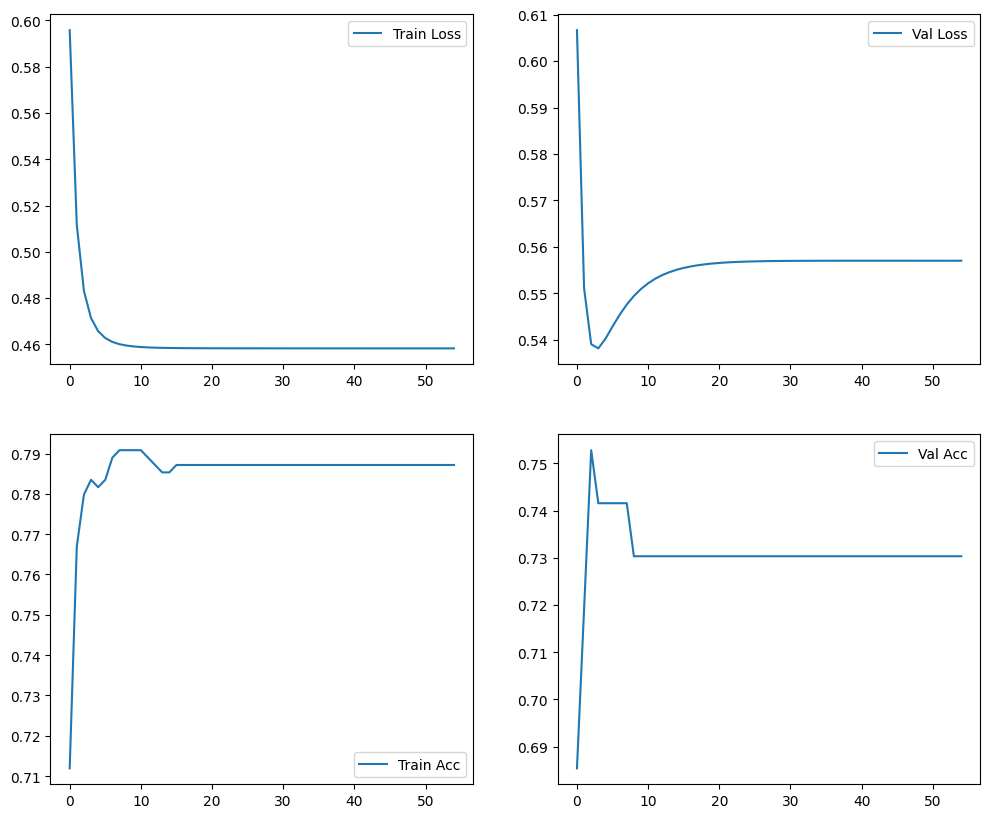

In [434]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].plot(train_losses, label="Train Loss")
ax[0,1].plot(val_losses, label="Val Loss")
ax[1,0].plot(train_accs, label="Train Acc")
ax[1,1].plot(val_accs, label="Val Acc")
for a in ax.flat: a.legend()

In [435]:
val_set_acc=accuracy(X_val,y_val,theta)
print("evaluation on validation")
print("accuracy:",val_set_acc)

test_set_acc=accuracy(X_test,y_test,theta)
print("evaluation on test")
print("accuracy:",test_set_acc)

evaluation on validation
accuracy: 0.7415730337078652
evaluation on test
accuracy: 0.7564102564102564
